# Contents

1. UnitedStates_COVID_19_dataset
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Concluding Remark

# 1. UnitedStates_COVID_19_dataset

This is the data repository for the 2019 Novel Coronavirus Visual Dashboard operated by the Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE). Also, Supported by ESRI Living Atlas Team and the Johns Hopkins University Applied Physics Lab (JHU APL)

# 2.Problem Definition

The dataset  is provided to identify the deaths and recovered cases.

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [21]:
df=pd.read_csv('covid-19_USA.csv')

In [22]:
df

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


In [23]:
df.dtypes


Province_State           object
Country_Region           object
Last_Update              object
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                     object
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [24]:
#lets first convert all categorial values into numerical values.

In [25]:
le = LabelEncoder()
list1 = ['Province_State','Country_Region','Last_Update','ISO3']
for val in list1:
    df[val] = le.fit_transform(df[val].astype(str))
                               

In [26]:
df.dtypes

Province_State            int32
Country_Region            int32
Last_Update               int32
Lat                     float64
Long_                   float64
Confirmed                 int64
Deaths                    int64
Recovered               float64
Active                  float64
FIPS                      int64
Incident_Rate           float64
People_Tested           float64
People_Hospitalized     float64
Mortality_Rate          float64
UID                       int64
ISO3                      int32
Testing_Rate            float64
Hospitalization_Rate    float64
dtype: object

In [16]:
#lets first check the null values

In [27]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [28]:
#Lets remove null values with mean
df =df.replace(np.NaN,df.mean())

In [29]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [30]:
df.head(10)

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,0,0,32.318200,-86.902300,13052,522,7007.428571,12530.0,1,266.194321,1.644500e+05,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,0,0,61.370700,-152.404400,401,10,352.000000,39.0,2,54.815493,3.704500e+04,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,2,0,0,-14.271000,-170.132000,0,0,7007.428571,0.0,60,0.000000,1.240000e+02,4897.454545,4.458248,16,0,222.857246,14.342541
3,3,0,0,33.729800,-111.431200,14906,747,3773.000000,10386.0,4,204.788838,1.654350e+05,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,0,0,34.969700,-92.373100,5003,107,3852.000000,1044.0,5,165.782801,9.625800e+04,535.000000,2.138717,84000005,4,3189.670370,10.693584
5,5,0,0,36.116200,-119.681600,85997,3497,7007.428571,82500.0,6,217.646575,1.380120e+06,4897.454545,4.066421,84000006,4,3492.893832,14.342541
6,6,0,0,39.059800,-105.311100,22797,1299,3478.000000,18020.0,8,395.868121,1.318370e+05,3955.000000,5.698118,84000008,4,2289.339188,17.348774
7,7,0,0,41.597800,-72.755400,39017,3529,6264.000000,29224.0,9,1094.357902,1.907180e+05,10946.000000,9.044775,84000009,4,5349.302875,28.054438
8,8,0,0,39.318500,-75.507100,8194,310,3965.000000,3919.0,10,841.476990,4.541200e+04,4897.454545,3.783256,84000010,4,4663.552976,14.342541
9,9,0,0,36.840089,-85.206614,49,0,7007.428571,49.0,88888,396.230806,2.258534e+05,4897.454545,0.000000,84088888,4,3894.186870,14.342541


In [10]:
#Lets drop columns Country_Region,Last_Update,UID.

In [31]:
df.drop('Country_Region',axis=1,inplace=True)
df.drop('Last_Update',axis=1,inplace=True)
df.drop('UID',axis=1,inplace=True)
df.drop('ISO3',axis=1,inplace=True)

In [32]:
df.shape

(58, 14)

In [35]:
#Lets describe the data statistically
df.describe()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000,58.000000
mean,28.500000,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,3894.186870,14.342541
std,16.886879,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,1898.951207,3.781861
min,0.000000,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,97.702058,6.778043
25%,14.250000,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,2741.843521,12.829963
50%,28.500000,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,3501.526835,14.342541
75%,42.750000,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,4622.586404,15.552021
max,57.000000,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,11377.424693,28.054438


In [36]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.153948,0.089445,0.006490,0.015229,0.067595,-0.027612,-0.195045,-0.078280,-0.065428,0.005461,0.019090,0.083183,-0.131694
Lat,0.153948,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,0.026456,-0.134906,0.309579,-0.066255
Long_,0.089445,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,0.079677,0.297192,0.190191,0.071381
Confirmed,0.006490,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,0.869267,0.382537,0.332464,0.287471
Deaths,0.015229,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,0.908279,0.427127,0.344465,0.298225
Recovered,0.067595,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,0.761829,0.322160,0.220597,0.231692
Active,-0.027612,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,0.835938,0.367626,0.321395,0.284564
FIPS,-0.195045,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,0.000009,-0.262178,-0.000100,-0.000118
Incident_Rate,-0.078280,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,0.551076,0.353882,0.620621,0.196029
People_Tested,-0.065428,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,0.642091,0.220200,0.230753,0.252680


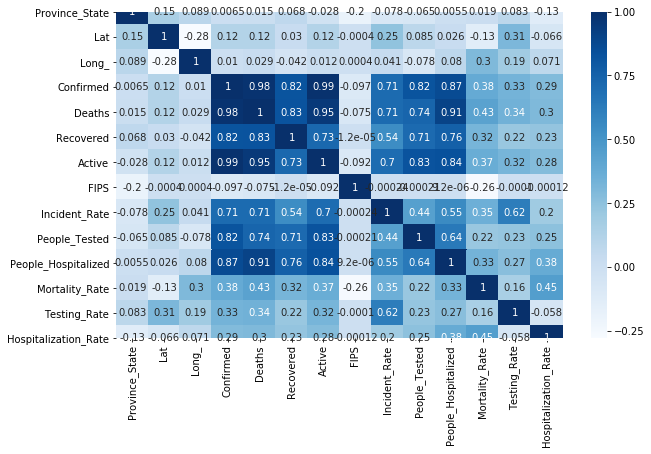

In [37]:
plt.figure(figsize = (10,6))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

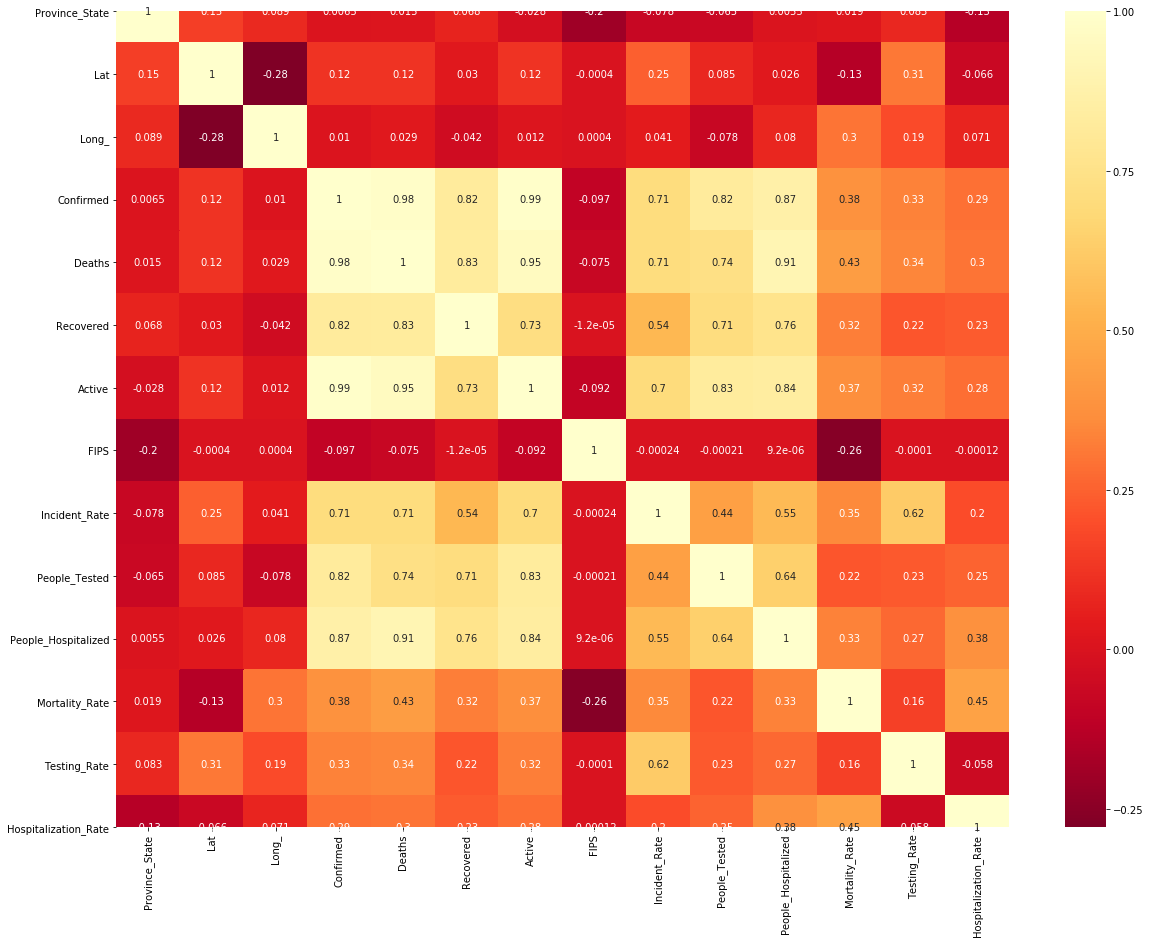

In [38]:
plt.figure(figsize = (20,15))
sns.heatmap(dfcor,cmap ='YlOrRd_r',annot = True)

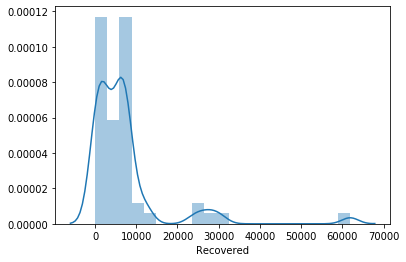

In [39]:
#Lets do univariate analysis
sns.distplot(df['Recovered'])

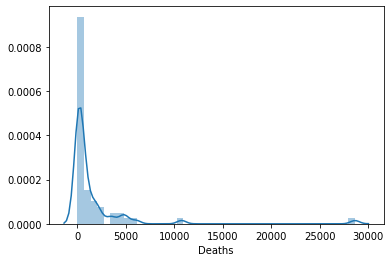

In [40]:
sns.distplot(df['Deaths'])

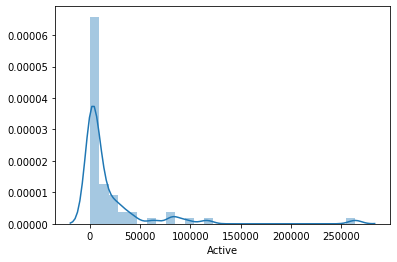

In [42]:
sns.distplot(df['Active'])

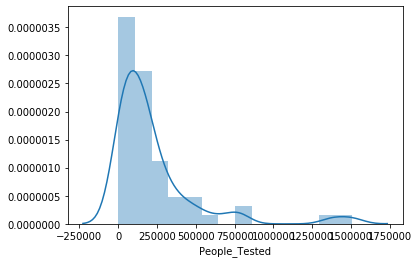

In [43]:
sns.distplot(df['People_Tested'])

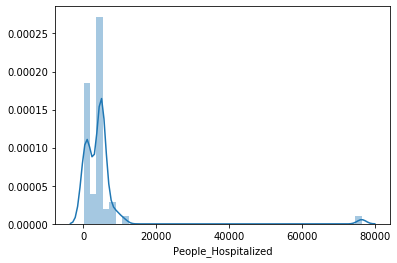

In [44]:
sns.distplot(df['People_Hospitalized'])

In [46]:
df.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [52]:
df=df.replace(np.NaN,df.mean())

In [48]:
df.isnull().sum()

Province_State          0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [49]:
df.skew()

Province_State          0.000000
Lat                    -2.250097
Long_                   3.567919
Confirmed               4.708614
Deaths                  5.489201
Recovered               3.647693
Active                  4.180953
FIPS                    5.269070
Incident_Rate           1.988351
People_Tested           2.829700
People_Hospitalized     6.869437
Mortality_Rate          0.496115
Testing_Rate            1.313407
Hospitalization_Rate    0.867341
dtype: float64

In [50]:
#Treating using log
import numpy as np
for col in df.columns:
    if df.skew().loc[col]>0.55:
        df[col] = np.log1p(df[col])

In [53]:
df.skew()

Province_State          0.000000
Lat                    -2.250097
Long_                   0.000000
Confirmed              -1.374603
Deaths                 -0.568714
Recovered              -1.124535
Active                 -0.994488
FIPS                    3.421540
Incident_Rate          -1.807259
People_Tested          -1.628988
People_Hospitalized    -0.928480
Mortality_Rate          0.496115
Testing_Rate           -2.962747
Hospitalization_Rate   -0.300911
dtype: float64

In [54]:
collist=df.columns.values
ncol=15
nrows=15

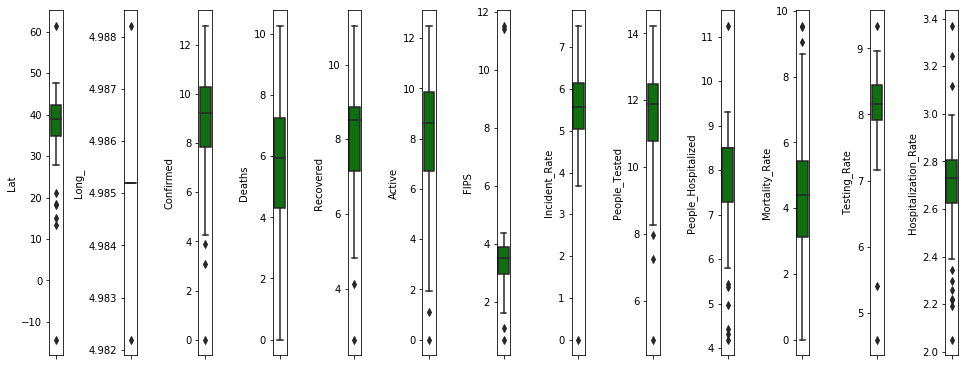

In [55]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(ncol,5*ncol))
for i in range (1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [38]:
#Lets do bivariate analysis with target variable.

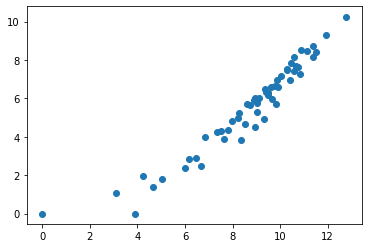

In [39]:
plt.scatter(df['Confirmed'],df['Deaths'])

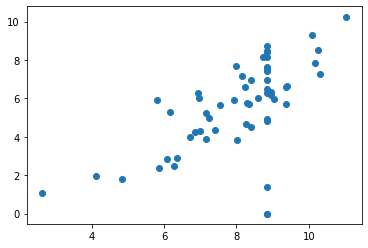

In [40]:
plt.scatter(df['Recovered'],df['Deaths'])

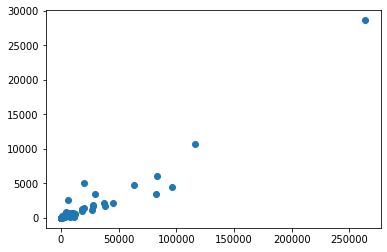

In [45]:
plt.scatter(df['Active'],df['Deaths'])

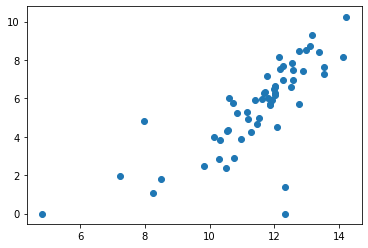

In [56]:
plt.scatter(df['People_Tested'],df['Deaths'])

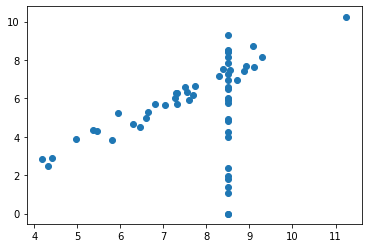

In [58]:
plt.scatter(df['People_Hospitalized'],df['Deaths'])

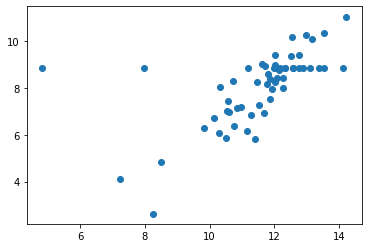

In [59]:
plt.scatter(df['People_Tested'],df['Recovered'])

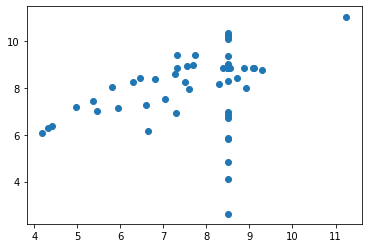

In [60]:
plt.scatter(df['People_Hospitalized'],df['Recovered'])

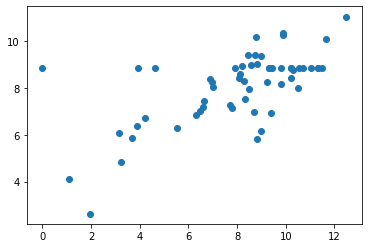

In [61]:
plt.scatter(df['Active'],df['Recovered'])

# Pre-processing Pipeline

In [62]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.70244092e+00, 4.26523477e-01, 1.58925762e-12, 3.21337477e-01,
        2.93758097e-01, 5.24234706e-01, 5.35925495e-01, 1.70638299e+00,
        6.37716112e-02, 3.00988812e-01, 3.36196024e-01, 2.18727182e-01,
        1.24077924e-02, 7.34372945e-01],
       [1.64270615e+00, 2.31382962e+00, 1.58925762e-12, 1.17083224e+00,
        1.39518751e+00, 1.43560153e+00, 1.55757824e+00, 1.46521910e+00,
        1.29808839e+00, 6.03392941e-01, 5.37895230e-01, 9.36418161e-01,
        5.95783355e-01, 1.20355520e-01],
       [1.58297138e+00, 4.82101134e+00, 1.58925762e-12, 3.74178007e+00,
        2.44393007e+00, 5.24234706e-01, 2.90133559e+00, 3.26423922e-01,
        4.79600309e+00, 4.05696273e+00, 5.37895230e-01, 4.23371775e-16,
        3.82171194e+00, 1.20355520e-01],
       [1.52323661e+00, 2.93375472e-01, 1.58925762e-12, 3.78280325e-01,
        4.50254778e-01, 1.18299979e-01, 4.67569559e-01, 1.16138852e+00,
        1.63325201e-01, 3.04612377e-01, 2.01907016e-01, 2.63675605e-01,
        5.384

In [63]:
threshold=3
print(np.where(z>3))

(array([ 2,  2,  2,  2,  2,  9, 13, 14, 39, 39, 44], dtype=int64), array([ 1,  3,  8,  9, 12,  7,  7,  2,  2,  5, 12], dtype=int64))


In [64]:
df_new=df[((z<3).all(axis=1))] #Removing the outliers


In [65]:
df.shape

(58, 14)

In [66]:
df_new.shape

(52, 14)

In [67]:
df_new.columns

Index(['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'FIPS', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

# Predicting Death cases

In [68]:
#Now lets train and test our data. Here our target variable is y i.e Deaths, and our input variables is x

In [70]:
df_x=df[['Province_State','Lat','Long_','Confirmed','Recovered','Active','FIPS','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']]

In [71]:
x=df_x

In [72]:
x.shape

(58, 13)

In [73]:
y=df[['Deaths']]

In [74]:
y.shape

(58, 1)

In [54]:
#Scaling the input variable
#Linearregression algorithm requires all features to be on common scale

In [75]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [76]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 84 is 0.9929224993132307


In [ ]:
#lets cross validate to avoid over fitting and undefitting of the model

In [77]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

0.9398345154532043

In [81]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 99,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)

In [79]:
lreg.score(x_train,y_train)

0.9959937382468861

In [82]:
print('error')
print('Mean squared:', mean_absolute_error(y_test,pred))
print('Mean Squared error:',mean_squared_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))
print('r2 score:',r2_score(y_test,y_pred))

error
Mean squared: 0.28015324879858705
Mean Squared error: 0.17631523328620916
Root Mean Squared Error: 0.4198990751194972
r2 score: 0.9572155745770607


In [84]:
#predict the value
pred = lreg.predict(x_test)
print("Predictd deaths:",pred)
print("Actual deaths:",y_test)


Predictd deaths: [[3.73800924]
 [4.32390345]
 [8.5535321 ]
 [7.48816767]
 [7.18834049]
 [2.52057113]
 [8.97351596]
 [3.00360137]
 [5.61825599]
 [5.95985522]
 [5.12279093]
 [6.25539634]]
Actual deaths:       Deaths
51  4.007333
16  4.356709
7   8.169053
24  7.661056
6   7.170120
30  2.833213
26  8.529319
14  1.791759
41  5.703782
10  6.011267
44  4.836282
28  6.347389


In [85]:
from sklearn.externals import joblib
joblib.dump(lreg,'lregsky.obj')
lregsky_from_joblib = joblib.load('lregsky.obj')
lregsky_from_joblib.predict(x_test)

array([[3.73800924],
       [4.32390345],
       [8.5535321 ],
       [7.48816767],
       [7.18834049],
       [2.52057113],
       [8.97351596],
       [3.00360137],
       [5.61825599],
       [5.95985522],
       [5.12279093],
       [6.25539634]])

# Predicting Recovered Cases

In [ ]:
#Now lets train and test our data. Here our target variable is y i.e Recovered, and our input variables is x

In [86]:
dr_x=df[['Province_State','Lat','Long_','Confirmed','Deaths','Active','FIPS','Incident_Rate','People_Tested','People_Hospitalized','Mortality_Rate','Testing_Rate','Hospitalization_Rate']]

In [87]:
x=dr_x

In [88]:
x.shape

(58, 13)

In [89]:
y=df[['Recovered']]

In [90]:
y.shape

(58, 1)

In [ ]:
#Scaling the input variable
#Linearregression algorithm requires all features to be on common scale

In [91]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

In [92]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model

max_r_score = 0
for r_state in range(42,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size = 0.20)
    regr = linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred = regr.predict(x_test)
    r2_scr = r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
print('max r2 score corresponding to',final_r_state,'is',max_r_score)

max r2 score corresponding to 61 is 0.8118799145060983


In [ ]:
#lets cross validate to avoid over fitting and undefitting of the model

In [93]:
from sklearn.model_selection import cross_val_score
cross_val_score(linear_model.LinearRegression(),x,y,cv=10,scoring ='r2').mean()

-2.019538825251641

In [98]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 61,test_size=0.20)
lreg = linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred = lreg.predict(x_test)

In [99]:
lreg.score(x_train,y_train)

0.6921267362438037

In [100]:
print('error')
print('Mean squared:', mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2 score:',r2_score(y_test,y_pred))

error
Mean squared: 0.7204933970140818
Mean Squared error: 0.7980339534272406
Root Mean Squared Error: 0.8933274614760484
r2 score: 0.8118799145060983


In [101]:
#doing gridseach for random forest

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae'],
    'random_state' :[42,46,55,58]
}

gd_sr = GridSearchCV(estimator=rf,
                    param_grid=param_grid,
                    scoring='r2',cv=5)
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'mse', 'max_depth': 7, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 46}
0.23898789852065605


In [104]:
rf=RandomForestRegressor(n_estimators = 200, random_state = 46, max_features = 'sqrt', max_depth = 7, criterion = 'mse')
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=46, verbose=0,
                      warm_start=False)

In [105]:
rf.score(x_train,y_train)

0.8955131464225239

In [112]:
pred = rf.predict(x_test)
pred

array([7.05100977, 8.75014781, 8.46551274, 7.86975651, 8.60116264,
       7.87416854, 6.22631982, 8.64219976, 8.95172439, 7.09682096,
       8.78669321, 9.04716265])

In [113]:
#lets cross validate to avoid over fitting and undefitting of the model

In [114]:
cross_val_score(rf,x,y,cv=10,scoring ='r2').mean()

-0.11608605057979715

In [111]:
#since rf is giving best score,so lets save this model

In [116]:
from sklearn.externals import joblib
joblib.dump(rf,'rfcovid-19.obj')
rf_from_joblib = joblib.load('rfcovid-19.obj')
rf_from_joblib.predict(x_test)

array([7.05100977, 8.75014781, 8.46551274, 7.86975651, 8.60116264,
       7.87416854, 6.22631982, 8.64219976, 8.95172439, 7.09682096,
       8.78669321, 9.04716265])

# 6.Conclusion

  1. Deaths:
        --people hospitalized, people tested,incident rate,active , confirmed are highly positively correlated with death variable.
        
    2.Recovered:
        --confirmed, death, active, people tested, people hospitalized,confirmed are highly positively correlated with recovered  variable